# Modeling Sequential Decision Problems

This notebook contains study notes based on the first chapter of Warren Powell's (2022) book [*Sequential Decision Analytics: Modeling with Python*](https://castle.princeton.edu/sdamodeling/).

Here's a link to relevant talk by Powell: [A Universal Framework for Sequential Decision Analytics](https://youtu.be/MGOSTRwQpZQ?si=mSt_adDKsTeHQaUo).

And here's a link to the official GitHub page that accompanies the book: [stochastic-optimization](https://github.com/wbpowell328/stochastic-optimization).

## Compact description

Sequential decision problems are processes of the form:$$ decision, information, decision, information, decision \ldots $$

Any such problem can be modeled as $$ ( S_0, x_0, W_1, S_1, x_1, W_2, \ldots , S_t, x_t, W_{t+1}, \ldots , S_T ), $$

where:
* $S_0$ is the *initial state variable* that captures:
    1. deterministic parameter values that never change
    2. initial values of quantities or parameters that do change
    3. beliefs about quantities or parameters that we don't know perfectly
* $S_t$ are *dynamic state variables* that captures all the information about the state of the system at time $t$ we need to compute the next state. There are three kinds:
    1. Physical state $R_t$
    2. Information state $I_t$
    3. Belief state $B_t$
* $x_t$ are *decision variables* that capture elements that controlled.
* $W_t$ are *exogenous information* that arrives after a decision $x_t$.

<div class="alert alert-block alert-info">
See notes about $S_0$ below.
</div>

Sometimes it's more natural to index decisions using a counter $n$. Then the process is$$ ( S^0, x^0, W^1, S^1, x^1, W^2, \ldots , S^n, x^n, W^{n+1}, \ldots , S^N ). $$And sometimes both index and time are captured, as in $(S^n_t, x^n_t,W^n_t)$.

States are updated by a *transition function* $S^M$ such that$$ S_{t+1} = S^M(S_t,x_t,W_{t+1}). $$

Decision variables $x_t$ are determined by a *policy* function denoted $X^{\pi}(S_t)$.

Decisions incur a *cost* or *contribution* $$C(S_t,x_t)=C(S_t,X^{\pi}(S_t)).$$

The objective is to find the best policy to optimize some metric. The most common way of writing the *objective function* is
$$ \max_{\pi} \mathbb{E} \left \{ \sum^T_{t=0} C ( S_t,X^{\pi}(S_t) ) \mid S_0 \right \}. $$

<div class="alert alert-block alert-info">
    <p>
        In the last equation above, the variable $S_0$ that appears after the "such that" line, "$\mid$", contains different information than the value of $S_t$ for $t=0$. This is a quirk of Powell's notation. It's a bit confusing but $S_0$ is not identical to $S_t$ for $t=0$. It would be less confusing if they were identical. The other information could be stored in a separate variable called $\Phi$ or something. The last equation would then become
    </p>
    <p>
        $$ \max_{\pi} \mathbb{E} \left \{ \sum^T_{t=0} C ( S_t,X^{\pi}(S_t) ) \mid ( S_0, \Phi ) \right \}. $$
    </p>
    <p>
        See the note below as well.
    </p>
</div>

## 6-Step Modeling Process 

Powell describes the modeling process in six steps:

1. Write a big picture **narrative** description of the process in plain English
2. Write down the **core elements** of the problem:
    * The metrics being impacted
    * The decisions being made
    * The sources of uncertainty
3. Write down a **mathematical model** including all the elements in the compact description, including
    * Initial state variable $S_0$
    * Dynamic state variables $S_t$
    * Decision variables $x_t$
    * Exogenous information variables $W_{t+1}$
    * The transition function $S^M(S_t,x_t,W_{t+1})$
    * The cost / contribution function $C(S_t, x_t)$
    * The objective function
4. Write down the **uncertainty model**
    * The initial state $S_0$ might specify distributions of uncertain state transition parameters
    * Specify the exogenous information process through one of three ways:
        1. Create a mathematical model
        2. Use observations of past events
        3. Run field experiments
5. Design **policy functions** using one of two core strategies
    1. Define a discrete set of functions to search over
    2. Define a parametric family of functions and an estimation of of the expected objective value of different parameter values
6. Find the best policy by **evaluating policies** through simulation or experimentation

## Policy Design

Powell suggests that all of the approaches of about 15 disntinct fields that deal with sequential decisions under uncertainty can be classified under two main strategies, each of which can be further divided into two sub-classes. These classes are: 

### A) Policy Search

Policy search involves using techniques like simulation to search over classes of policy functions and possible over values of tunable parameters of policies.

#### 1. Policy function approximations (PFAs)

These are analytical 
functions of a state that directly specify an action.

#### 2. Cost function approximations (CFAs)

These are policies that involve solving an optimization problem that is typically a simplification of the original problem, with parameters introduced to help make the policy work better over time.

### B) Lookahead Policies 

These are policies constructed by approximating the downstream costs (or rewards) from making a decision now, which are then considered along with the initial cost (or reward) of the initial decision.

#### 3. Value function approximations (VFAs)

These are policies that are based on Bellman’s equation where the value function in Bellman's equation is replaced with some approximation.

#### 4. Direct lookahead approximations (DLAs)

These are policies derived from optimizing over a simplified approximate model (often deterministic) over some planning horizon.

## A Simple Example: Inventory Problem 

Powell provides the following simple example to illustrate the above ideas.

### 1. Narative

A pizza restaurant has to decide how many pounds of sausage to order from its food distributor. The restaurant has to make the decision at the end of day $t$, communicate the order which then arrives the following morning to meet tomorrow’s orders. If there is sausage left over, it can be held to the following day. The cost of the sausage, and the price that it will be sold for the next day, is known in advance, but the demand is not.

### 2. Core Elements

* **Metrics** - We want to maximize profits given by the sales of sausage minus the cost of purchasing the sausage.
* **Decisions** - We have to decide how much to order at the end of one day. Orders arrive at the beginning of the next day.
* **Sources of Uncertainty** - The only source of uncertainty in this example is the demand for sausage the next day. 

### 3. Mathematical Model

#### State variables

The *initial state variable* is

$$S_0 = (p,c,\bar{D},\bar{\sigma}^D),$$

where $p$ is the price we charge for sausage, $c$ is our purchase cost of sausage, and $(\bar{D},\bar{\sigma}^D)$ are the mean and standard deviation of the demand, and $R_0^{\text{inv}}$ is the initial inventory level of sausage.

The *dynamic state variable* is

$$S_t=R_t^{\text{inv}},$$

where $R_t^{\text{inv}}$ is the amount of sausage in inventory at time $t$.

<div class="alert alert-block alert-info">
    <p>
        Note that $S_0 \neq R_0^{\text{inv}}$. It would be less confusing if we had $S_0=R_0^{\text{inv}}$ and $\Phi = (p,c,\bar{D},\bar{\sigma}^D)$.
    </p>
    <p>
        See note about $S_0$ above as well.
    </p>
</div>

#### Decision variable

The decision variable $x_t$ is how much sausage we order at time $t$.

#### Exogenous information

The exogenous information is the random demand for sauage, denoted

$$W_{t+1}=\hat{D}_{t+1}.$$

#### Transition Function

The inventory left at the end of the day $t+1$, will be the inventory left at the end of day $t$, plus how much we order on day $t$, minus the random demand on day $t+1$, or zero if we run out of sausage before the full demand is met. We can write that as follows:

$$ R_{t+1}^{\text{inv}} =\max{\left\{ 0, R_t^{\text{inv}} +x_t + \hat{D}_{t+1} \right\}}. $$

#### Contribution Function

The contribution to profit for buying $x_t$ sausage on day $t$ is the selling price $p$ of sausage multiplied by how much was sold, which is the least of the full inventory $R_t^{\text{inv}} +x_t$ at day $t+1$ or the random demand $\hat{D}_{t+1}$ on day $t+1$, minus the cost of sausage $c$ multiplied by how much was bought $x_t$. The following formula will compute the contribution:

$$ C(S_t,x_t,\hat{D}_{t+1}) = p \min \left \{R^{\text{inv}}_t+x_t,\hat{D}_{t+1} \right \} -cx_t. $$

#### Objective Function

The objective is to find the policy $\pi$ that maximize sum total of profits over all time periods, averaged over the random demand process $\hat{D}_1,\ldots,\hat{D}_T$.

$$ \max_{\pi} F^{\pi} = \max_{\pi} \mathbb{E} \left \{ \sum_{t=0}^T C(S_t,X^{\pi}(S_t),\hat{D}_{t+1}) \mid S_0 \right \}. $$

### 4. Uncertainty Model

A simple mathematical model for the demand process is to assume demand is normally distributed with some mean $\bar{D}$ and standard deviation $\bar{\sigma}^D$. If these are known, demand can be written as

$$ \hat{D}_{t+1} \sim N (\bar{D}, (\bar{\sigma}^D)^2 ). $$

### 5. Policy

A common policy for inventory problems is called "order-up-to" which can be written as

$$ 
X^{\pi}(S_t \mid \theta)=\bigg\{\begin{array}{cl}
\theta^{max} - R_t & \text{if } R_t \lt \theta^{min}, \\
0 & \text{otherwise} ,
\end{array}
$$

where $\theta=(\theta^{min},\theta^{max})$ is a set of tunable parameters that define a lower and upper limit for inventory levels such that inventories are restored up to the upper limit when they drop below the lower limit.

### 6. Evaluation

Even though there is no analytical way to compute the value of the objective function exactly, we can resort to numerical estimation using simulation. We can simulate $N$ sample paths of random demands $\hat{D}^n_1,\ldots,\hat{D}^n_T$ and estimate the expected profits by averaging over these samples like this:

$$ \bar{F}^{\pi}(\theta) = \frac{1}{N} \sum_{n=1}^{N} \sum_{t=0}^{T} C(S_t,X^{\pi}(S_t\mid\theta),\hat{D}^n_{t+1}). $$

Then we're left to find the value of $\theta=(\theta^{min},\theta^{max})$ that gives the highest average profit as computed above.

### Python Implementation

#### Import Libraries 

We're going to use a couple of common libraries:

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

#### Simulate One Repetition Of T Days 

We define a function to define values of $S_0$.

In [2]:
def init_S0(p,c,Dhat,sigmahatD):
    S0 = {
        'p': p,
        'c': c,
        'Dhat': Dhat,
        'sigmahat^D': sigmahatD
    }
    return S0

For example, we can arbitrarily let

$$S_0 = (p,c,\bar{D},\bar{\sigma}^D) = (2,1.5,50,10).$$

In [3]:
S0 = init_S0(2,1.5,50,15)
print(S0)

{'p': 2, 'c': 1.5, 'Dhat': 50, 'sigmahat^D': 15}


We define the transition function as follows:

In [4]:
def SM(S_t, x_t, W_tp1):
    return np.max([0, S_t + x_t - W_tp1])

For example:

In [5]:
SM(40, 40, 50)

30

In [6]:
SM(10,10, 50)

0

We define the contribution function as follows:

In [7]:
def C(S_t, x_t, W_tp1, S0):
    p = S0['p']
    c = S0['c']
    return p*np.min([S_t + x_t, W_tp1]) - c*x_t

For example:

In [8]:
C(10,10,50,S0)

25.0

In [9]:
C(100,0,50,S0)

100.0

We define the function that draws one random sample from a normal distribution with mean $\hat{D}$ and standard deviation $\hat{\sigma}^D$ as follows:

In [10]:
def WM(S0):
    return np.random.normal(S0['Dhat'], S0['sigmahat^D'])

For example:

In [11]:
WM(S0)

47.771307967336284

In [12]:
WM(S0)

49.294373076906666

We define the order-up-to policy function like this:

In [13]:
def Xpi(S_t, theta):
    theta_min = theta['theta_min']
    theta_max = theta['theta_max']
    if S_t < theta_min:
        return theta_max - S_t
    else:
        return 0

For example:

In [14]:
theta = {
    'theta_min': 50,
    'theta_max': 100
}

In [15]:
Xpi(30, theta)

70

In [16]:
Xpi(90, theta)

0

We define a simulation of one sample of $T$ times as follows:

In [17]:
def sim_one_rep(p,c,Dhat,sigmahatD,S_0,num_days,theta):
    S0 = init_S0(p,c,Dhat,sigmahatD)
    T_ = np.arange(0, num_days, dtype=int)
    S_ = np.zeros(num_days, dtype=float)
    S_[0] = S_0
    x_ = np.zeros(num_days, dtype=float)
    W_ = np.zeros(num_days, dtype=float)
    C_ = np.zeros(num_days, dtype=float)

    for t in T_[:-1]:
        x_[t] = Xpi(S_[t], theta)
        W_[t+1] = WM(S0)
        C_[t] = C(S_[t],x_[t],W_[t+1],S0)
        S_[t+1] = SM(S_[t],x_[t],W_[t+1])

    df = pd.DataFrame({'t':T_, 'S_t':S_, 'x_t':x_, 'W_t':W_, 'C_t':C_})
    df['Cumulative(C_t)'] = df['C_t'].cumsum()
    
    return df
        

For example:

In [18]:
p = np.float32(2)
c = np.float32(1.5)
Dhat = np.float32(50)
sigmahatD = np.float32(15)
S_0 = np.float32(0)
num_days = np.int64(365)
theta = {
    'theta_min': np.float32(50),
    'theta_max': np.float32(100)
}
results_one_rep = sim_one_rep(p,c,Dhat,sigmahatD,S_0,num_days,theta)

In [19]:
results_one_rep.head()

,t,S_t,x_t,W_t,C_t,Cumulative(C_t)
0,0,0.000000,100.000000,0.000000,-22.806452,-22.806452
1,1,36.403226,63.596774,63.596774,-15.244259,-38.050711
2,2,59.924549,0.000000,40.075451,119.849098,81.798387
3,3,0.000000,100.000000,73.046077,-43.388004,38.410383
4,4,46.694002,53.305998,53.305998,5.374180,43.784563


In [20]:
results_one_rep.tail()

,t,S_t,x_t,W_t,C_t,Cumulative(C_t)
360,360,59.505181,0.00000,40.494819,94.199322,8708.683202
361,361,12.405520,87.59448,47.099661,68.608280,8777.291482
362,362,0.000000,100.00000,100.817929,-44.181779,8733.109702
363,363,47.090890,52.90911,52.909110,54.902708,8788.012410
364,364,32.866813,0.00000,67.133187,0.000000,8788.012410


We can check a histogram of random demands.

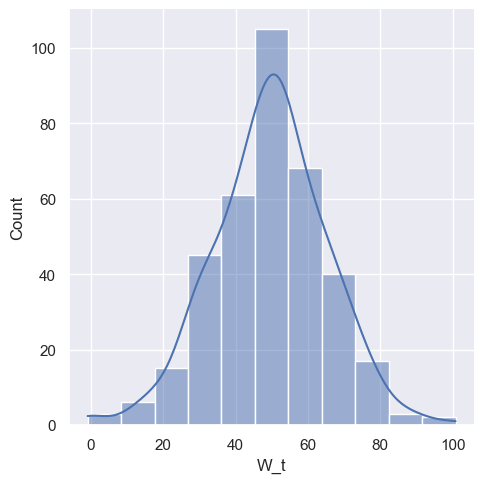

In [21]:
sns.displot(data=results_one_rep, x="W_t", kde=True, bins=11)

And we can check total cumulative contirbutions over time.

<Axes: xlabel='t', ylabel='Cumulative(C_t)'>

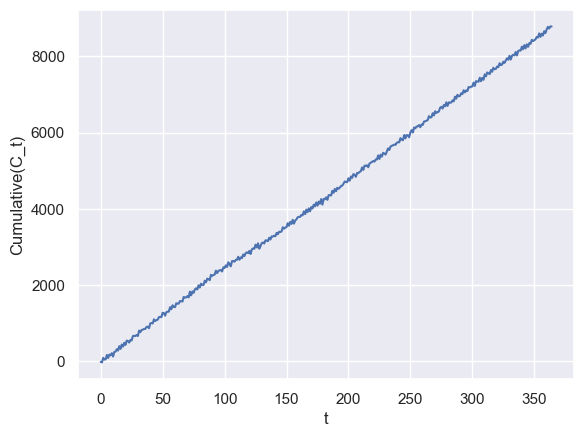

In [22]:
sns.lineplot(data=results_one_rep, x="t", y='Cumulative(C_t)')

#### Simulate Many Repetitions To Estimate Value of Policy

To evaluate the policy, we can repeat the simulation $N$ times and calculate the average total cumulative contributions. 

In [23]:
def sim_N_reps(p,c,Dhat,sigmahatD,S_0,num_days,theta,N):
    reps = np.arange(0, N, dtype=int)
    results_array = [None] * N
    total_contributions = np.zeros(N, float)
    for n in reps:
        results = sim_one_rep(p,c,Dhat,sigmahatD,S_0,num_days,theta)
        results_array[n] = results
        total_contributions[n] = results['Cumulative(C_t)'].iloc[-1]
    
    df = pd.DataFrame({'Repetition': reps, 'Total Contributions': total_contributions})
    df['Cumulative Average'] = df['Total Contributions'].expanding().mean()

    return df

For example:

In [24]:
N = 300
results_N_reps = sim_N_reps(p,c,Dhat,sigmahatD,S_0,num_days,theta,N)

In [25]:
results_N_reps.head()

,Repetition,Total Contributions,Cumulative Average
0,0,8739.705819,8739.705819
1,1,9057.862658,8898.784238
2,2,9064.632946,8954.067141
3,3,8901.333082,8940.883626
4,4,9006.964494,8954.099799


In [26]:
results_N_reps.tail()

,Repetition,Total Contributions,Cumulative Average
295,295,8720.635402,8874.690415
296,296,8837.061979,8874.563720
297,297,8755.769996,8874.165083
298,298,8673.098926,8873.492621
299,299,9050.465396,8874.082530


We can check the distribution of total contributions as follows:

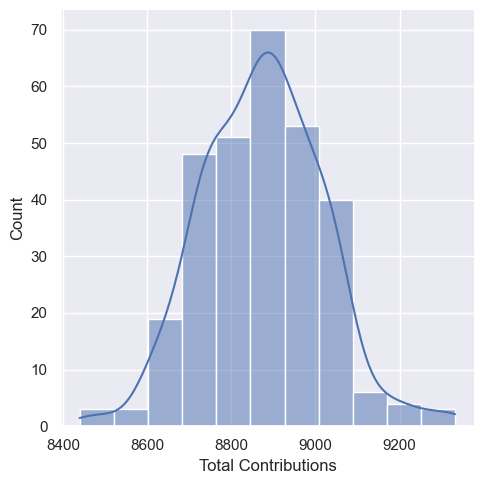

In [27]:
sns.displot(data=results_N_reps, x="Total Contributions", kde=True, bins=11)

And we can check a plot of how the cumulative average converges over time as follows:

<Axes: xlabel='Repetition', ylabel='Total Contributions'>

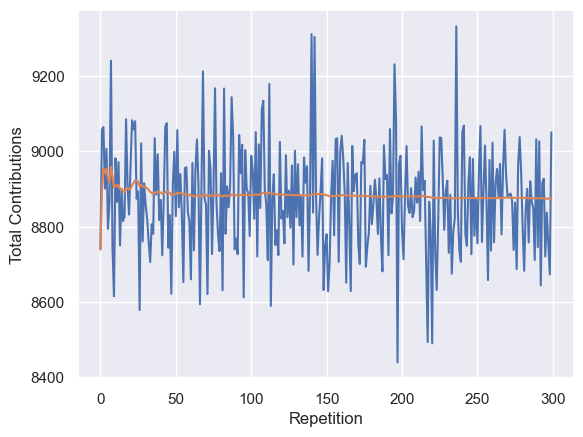

In [28]:
sns.lineplot(data=results_N_reps, x="Repetition", y='Total Contributions')
sns.lineplot(data=results_N_reps, x="Repetition", y='Cumulative Average')

Finally, we can numerically estimate the value of the specified policy for this sequential decision problem given by the formula:

$$ \bar{F}^{\pi}(\theta) = \frac{1}{N} \sum_{n=1}^{N} \sum_{t=0}^{T} C(S_t,X^{\pi}(S_t\mid\theta),\hat{D}^n_{t+1}), $$

as follows:

In [29]:
F_est = results_N_reps['Total Contributions'].sum() / N
print(F_est)

8874.082530442962


Or since we already calculated it in the cumulative average column, we can just read it off from the last row as follows:

In [30]:
F_est = results_N_reps['Cumulative Average'].iloc()[-1]
print(F_est)

8874.082530442962


#### Search over values of $\theta$

Powell suggest a brute force trial and error search as a simple and practical way to start.

We want to search over pairs of candidate values $ \theta = ( \theta^{min}, \theta^{max} )$ such that $\theta^{min} \lt \theta^{max}$.

If we start with an ordered array of values like this:

In [31]:
vals = np.arange(start=30, stop=160, step=15)
print(vals)

[ 30  45  60  75  90 105 120 135 150]


We can generate all the pairs of canditate values that meet the above criterion by starting with the smallest and pairing it with each of the greater values in order, and moving to the next smallest and pairing it with each of the greater values, etc.

In general, if we have $v=$ `len(vals)`, there will be $ \sum^{v-1}_{i=1} i $ pairs of values that satisfy the above criterion.

In [32]:
v = len(vals)
print(v)

9


In [33]:
num_pairs = np.arange(1, v).sum()
print(num_pairs)

36


In [34]:
candidate_theta_values = [None] * num_pairs
k = 0
for i in range(v):
    for j in range(i + 1, v):
        candidate_theta_values[k] = {
            'theta_min': np.float32(vals[i]),
            'theta_max': np.float32(vals[j])
        }
        k += 1
candidate_theta_values

[{'theta_min': 30.0, 'theta_max': 45.0},
 {'theta_min': 30.0, 'theta_max': 60.0},
 {'theta_min': 30.0, 'theta_max': 75.0},
 {'theta_min': 30.0, 'theta_max': 90.0},
 {'theta_min': 30.0, 'theta_max': 105.0},
 {'theta_min': 30.0, 'theta_max': 120.0},
 {'theta_min': 30.0, 'theta_max': 135.0},
 {'theta_min': 30.0, 'theta_max': 150.0},
 {'theta_min': 45.0, 'theta_max': 60.0},
 {'theta_min': 45.0, 'theta_max': 75.0},
 {'theta_min': 45.0, 'theta_max': 90.0},
 {'theta_min': 45.0, 'theta_max': 105.0},
 {'theta_min': 45.0, 'theta_max': 120.0},
 {'theta_min': 45.0, 'theta_max': 135.0},
 {'theta_min': 45.0, 'theta_max': 150.0},
 {'theta_min': 60.0, 'theta_max': 75.0},
 {'theta_min': 60.0, 'theta_max': 90.0},
 {'theta_min': 60.0, 'theta_max': 105.0},
 {'theta_min': 60.0, 'theta_max': 120.0},
 {'theta_min': 60.0, 'theta_max': 135.0},
 {'theta_min': 60.0, 'theta_max': 150.0},
 {'theta_min': 75.0, 'theta_max': 90.0},
 {'theta_min': 75.0, 'theta_max': 105.0},
 {'theta_min': 75.0, 'theta_max': 120.0},
 {

Now we can loop through this array of candidate values for $\theta$, estimate the value of the defined policy for each like we did above, and record the results in a dataframe as follows:

In [35]:
def search_over_theta(p,c,Dhat,sigmahatD,S_0,num_days,candidate_theta_values,N):
    num_candidates = len(candidate_theta_values)
    theta_min = np.zeros(num_candidates, dtype=float)
    theta_max = np.zeros(num_candidates, dtype=float)
    F_est = np.zeros(num_candidates, dtype=float)
    for i, candidate_theta in enumerate(candidate_theta_values):
        results_N_reps = sim_N_reps(p,c,Dhat,sigmahatD,S_0,num_days,candidate_theta,N)
        theta_min[i] = candidate_theta['theta_min']
        theta_max[i] = candidate_theta['theta_max']
        F_est[i] = results_N_reps['Cumulative Average'].iloc()[-1]

    df = pd.DataFrame({'theta_min': theta_min, 'theta_max': theta_max, 'F_est': F_est,})
    
    return df

In [36]:
results_search = search_over_theta(p,c,Dhat,sigmahatD,S_0,num_days,candidate_theta_values,N)
results_search

,theta_min,theta_max,F_est
0,30.0,45.0,7470.939392
1,30.0,60.0,8474.428926
2,30.0,75.0,8396.101016
3,30.0,90.0,8304.707995
4,30.0,105.0,8481.238492
5,30.0,120.0,8611.990287
6,30.0,135.0,8601.305752
7,30.0,150.0,8621.084319
8,45.0,60.0,8666.316288
9,45.0,75.0,8935.836720


We can find the candidate value for $\theta$ with the highest estimated policy value as follows:

In [37]:
idx_max = results_search.F_est.idxmax()
results_search.iloc[idx_max]

theta_min      75.000000
theta_max      90.000000
F_est        9029.647988
Name: 21, dtype: float64

Or if we wanted to see the top five best candidate values for $\theta$, we could inspect the head of the sorted dataframe like this:

In [38]:
results_search.sort_values('F_est', ascending=False).head()

,theta_min,theta_max,F_est
21,75.0,90.0,9029.647988
22,75.0,105.0,9017.390385
23,75.0,120.0,9014.392440
15,60.0,75.0,9013.995156
16,60.0,90.0,9011.359343


Given the wide range of $\theta$ values that give very similar values for $\bar{F}^{\pi}(\theta)$, and given that this is just a toy model for illustrating the basic ideas of modeling sequential decision problems, we can consider our job done.